# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
5. Applicates that are married 
6. Applicants with more dependents are likely to get a loan. 
7. Applicants with lower income will likely get a loan 

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [179]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("data.csv") 
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [5]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Look at some basic statistics for numerical variables.

In [21]:
# how many applicants have credit_history?
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

5403.459283387622
3812.5


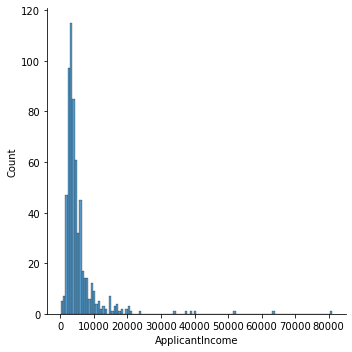

In [32]:
# Is the applicantIncome distribution in line with expectation?
print(df['ApplicantIncome'].mean())
print(df['ApplicantIncome'].median())
sns.displot(df['ApplicantIncome'])

1621.245798027101
1188.5


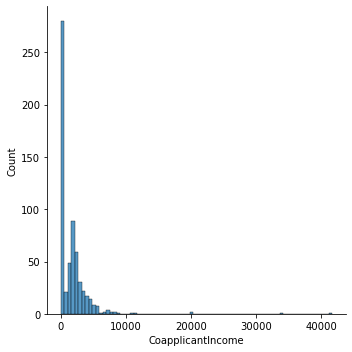

In [31]:
# Seems like coapplicants have lower income than the applicants themselves. 
print(df['CoapplicantIncome'].mean())
print(df['CoapplicantIncome'].median())
sns.displot(df['CoapplicantIncome'])

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [35]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [42]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [45]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Conclusion: 
More Males than Females, More people are Married, Most people don't have dependents
Most people have education, most people are not self employed, most people live in semiurban areas
most people are approved. 

In [54]:
df['ApplicantIncome'].min()

150

In [55]:
df['ApplicantIncome'].max()

81000

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



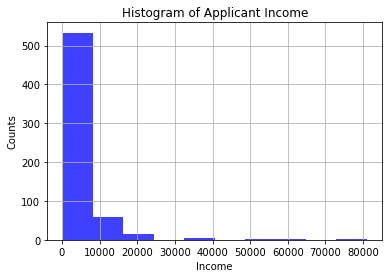

In [65]:
# the histogram of the data
n, bins, patches = plt.hist(df['ApplicantIncome'], 10, density=False, facecolor='blue', alpha=0.75)

plt.xlabel('Income')
plt.ylabel('Counts')
plt.title('Histogram of Applicant Income')
plt.grid(True)
plt.show()


Look at box plots to understand the distributions. 

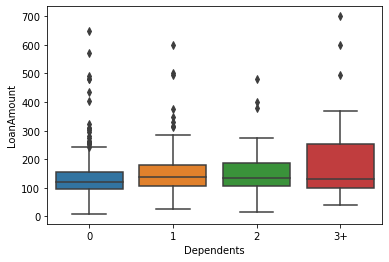

In [183]:
ax = sns.boxplot(x=df['Dependents'], y=df['LoanAmount'], data=df)

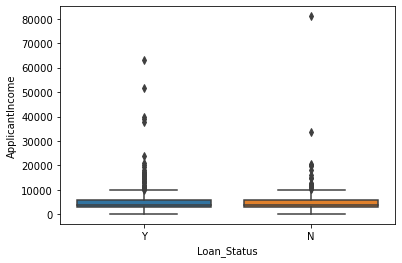

In [73]:
ax = sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'], data=df)

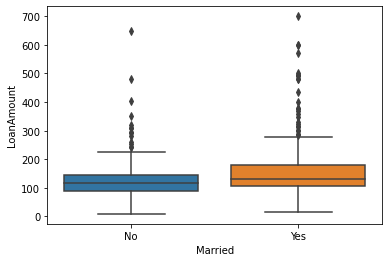

In [181]:
ax = sns.boxplot(x=df['Married'], y=df['LoanAmount'], data=df)

Look at the distribution of income segregated  by `Education`

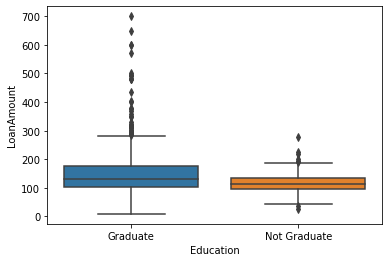

In [180]:
ax = sns.boxplot(x=df['Education'], y=df['LoanAmount'], data=df)
# people that graduate have a greater variation in income. 

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

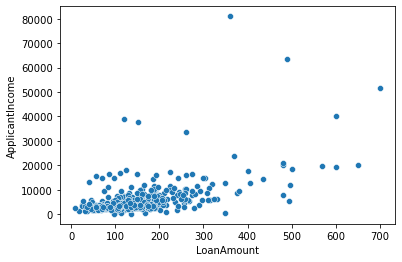

In [78]:
sns.scatterplot(data=df, x="LoanAmount", y="ApplicantIncome")
# seems like the more income people have, the more likely they are to get a loan?

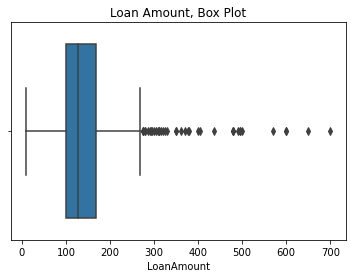

In [83]:
ax = sns.boxplot(x=df['LoanAmount'])
ax.title.set_text('Loan Amount, Box Plot')

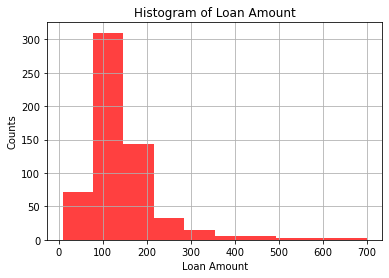

In [84]:
# the histogram of the data
n, bins, patches = plt.hist(df['LoanAmount'], 10, density=False, facecolor='red', alpha=0.75)

plt.xlabel('Loan Amount')
plt.ylabel('Counts')
plt.title('Histogram of Loan Amount')
plt.grid(True)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [88]:
table = pd.pivot_table(df, values=['ApplicantIncome', 'LoanAmount'], index=['Property_Area', 'Education'],
                    aggfunc={'ApplicantIncome': [np.mean, np.median, min, max],
                             'LoanAmount': [np.mean, np.median, min, max]})

In [89]:
table

ApplicantIncome                               \
                                       max         mean  median     min   
Property_Area Education                                                   
Rural         Graduate             81000.0  6162.687023  4191.0   150.0   
              Not Graduate          7667.0  3893.104167  3599.5  1820.0   
Semiurban     Graduate             39999.0  5699.994652  4124.0  1500.0   
              Not Graduate         17263.0  3634.739130  3253.0   210.0   
Urban         Graduate             63337.0  5792.327160  3750.0   416.0   
              Not Graduate         18165.0  3802.225000  3046.5  1442.0   

                           LoanAmount                           
                                  max        mean median   min  
Property_Area Education                                         
Rural         Graduate          570.0  163.023622  141.0  40.0  
              Not Graduate      218.0  122.543478  120.0  48.0  
Semiurban     Graduate          600.0  152.587912  131.0  25.0  
              Not Graduate      279.0  117.478261  110.5  25.0  
Urban         Graduate          700.0  148.480769  120.0   9.0  
              Not Graduate      186.0  114.200000  120.0  35.0

Notes: 
People that live in Rural areas that are graduates have the highest mean/ median income.
- but area matters very little. 

People that go to school in general have higher incomes. - These people also tend to get higher loans. 

In [90]:
table = pd.pivot_table(df, values=['ApplicantIncome', 'LoanAmount'], index=['Gender', 'Married'],
                    aggfunc={'ApplicantIncome': [np.mean, np.median, min, max],
                             'LoanAmount': [np.mean, np.median, min, max]})

In [91]:
table

ApplicantIncome                              LoanAmount  \
                           max         mean  median     min        max   
Gender Married                                                           
Female No              18165.0  4503.787500  3525.5   416.0      350.0   
       Yes             19484.0  4829.645161  3625.0   210.0      600.0   
Male   No              37719.0  5236.146154  3861.5  1442.0      650.0   
       Yes             81000.0  5529.540616  3875.0   150.0      600.0   

                                         
                      mean median   min  
Gender Married                           
Female No       116.115385  112.0   9.0  
       Yes      153.322581  124.0  36.0  
Male   No       136.088000  120.0  25.0  
       Yes      154.011662  132.0  17.0

overall doesn't seem like marriage is a big factor. (based on median)
Males tend to get a bit more loans, but overall very similar. 
Inconclusive about loan amounts for dependents, 3+ tend to make more money. 
Self_Employed people spend more money

In [94]:
table = pd.pivot_table(df, values=['ApplicantIncome', 'LoanAmount'], index=['Dependents'],
                    aggfunc={'ApplicantIncome': [np.mean, np.median, min, max],
                             'LoanAmount': [np.mean, np.median, min, max]})

In [95]:
table

ApplicantIncome                              LoanAmount  \
                       max         mean  median     min        max   
Dependents                                                           
0                  63337.0  4917.423188  3598.0   150.0      650.0   
1                  37719.0  5962.274510  4051.5  1000.0      600.0   
2                  17500.0  4926.782178  4006.0   210.0      480.0   
3+                 81000.0  8581.215686  4691.0   416.0      700.0   

                                     
                  mean median   min  
Dependents                           
0           135.886228  120.0   9.0  
1           158.622449  139.0  26.0  
2           150.224490  133.0  17.0  
3+          190.897959  130.0  40.0

In [162]:
#Checking with cleaned data. 
table = pd.pivot_table(cleaned_df, values=['Log_Income', 'Log_LoanAmount'], index=['Loan_Amount_Term','Loan_Status'],
                    aggfunc={'Log_Income': [np.mean, np.median, min, max],
                             'Log_LoanAmount': [np.mean, np.median, min, max]})

In [155]:
table

Log_Income                                \
                                    max      mean    median       min   
Loan_Amount_Term Loan_Status                                            
12.0             Y             8.920255  8.920255  8.920255  8.920255   
36.0             N             8.155075  8.137088  8.137088  8.119101   
60.0             Y             9.067163  8.967506  8.967506  8.867850   
84.0             N             8.893298  8.893298  8.893298  8.893298   
                 Y             8.656259  8.400857  8.352083  8.194229   
120.0            Y             8.194229  8.039973  8.148735  7.776954   
180.0            N            10.647399  8.779817  8.604105  7.968666   
                 Y            11.056225  8.873597  8.796036  7.907284   
240.0            N             8.699515  8.699515  8.699515  8.699515   
                 Y             9.215029  8.564551  8.291045  8.187577   
300.0            N             9.024011  8.375781  8.370316  7.686162   
                 Y            10.854431  9.110780  8.874537  8.135640   
360.0            N            11.302204  8.685527  8.591558  7.273786   
                 Y            10.689601  8.654381  8.597297  7.582229   
480.0            N             8.955448  8.329223  8.238537  7.712891   
                 Y             9.911753  8.560854  8.416742  7.946264   

                             Log_LoanAmount                                
                                        max      mean    median       min  
Loan_Amount_Term Loan_Status                                               
12.0             Y                 4.709530  4.709530  4.709530  4.709530  
36.0             N                 5.043425  4.712726  4.712726  4.382027  
60.0             Y                 5.043425  4.935869  4.935869  4.828314  
84.0             N                 5.147494  5.147494  5.147494  5.147494  
                 Y                 4.969813  4.768635  4.682131  4.653960  
120.0            Y                 3.218876  3.090322  3.218876  2.833213  
180.0            N                 5.857933  4.755090  4.836282  3.806662  
                 Y                 6.396930  4.848027  4.852030  3.688879  
240.0            N                 5.323010  5.323010  5.323010  5.323010  
                 Y                 4.852030  4.456408  4.605170  3.912023  
300.0            N                 5.192957  4.635200  4.595120  4.174387  
                 Y                 6.551080  5.119634  4.992534  4.094345  
360.0            N                 6.345636  4.914560  4.852030  2.197225  
                 Y                 6.396930  4.852786  4.852030  3.258097  
480.0            N                 5.231109  4.682103  4.624973  4.143135  
                 Y                 6.476972  5.058304  4.769786  4.543295

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [99]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Change 'Gender to Other'
Married to "No"
Dependents to 0
Self_employed to No
LoanAmount median
Loan_amount_term mode
credit_History to 0. 

In [109]:
#Changing History and Dependents to Zero
df[['Credit_History', 'Dependents']]= df[['Credit_History','Dependents']].fillna(value=0)
#Changing Self_employed and Married to No
df[['Married','Self_Employed']]= df[['Married','Self_Employed']].fillna('No')
#Changing Loan to Median
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].median())
#Changing Loan term amount to mode
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
#Changing Gender to Other
df['Gender'] = df['Gender'].fillna('Other')
#Making a copy of the cleaned df. 
cleaned_df = df.copy()

In [110]:
#Changing Self_employed and Married to No
df[['Married','Self_Employed']]= df[['Married','Self_Employed']].fillna('No')

In [111]:
#Changing Loan to Median
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].median())

In [113]:
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [114]:
#Changing Gender to Other
df['Gender'] = df['Gender'].fillna('Other')

In [117]:
#Making a copy of the cleaned df. 
cleaned_df = df.copy()

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

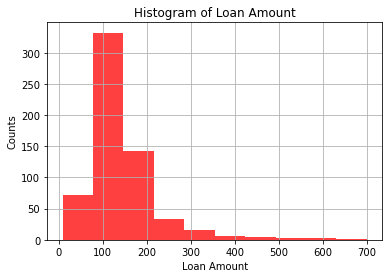

In [118]:
# the histogram of the data
n, bins, patches = plt.hist(cleaned_df['LoanAmount'], 10, density=False, facecolor='red', alpha=0.75)

plt.xlabel('Loan Amount')
plt.ylabel('Counts')
plt.title('Histogram of Loan Amount')
plt.grid(True)
plt.show()

In [119]:
cleaned_df['Log_LoanAmount'] = np.log(cleaned_df['LoanAmount'])

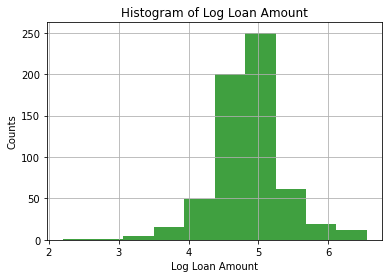

In [120]:
# the histogram of the data
n, bins, patches = plt.hist(cleaned_df['Log_LoanAmount'], 10, density=False, facecolor='g', alpha=0.75)

plt.xlabel('Log Loan Amount')
plt.ylabel('Counts')
plt.title('Histogram of Log Loan Amount')
plt.grid(True)
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [121]:
cleaned_df['Log_Income'] = np.log(cleaned_df['ApplicantIncome'] + cleaned_df['CoapplicantIncome'])

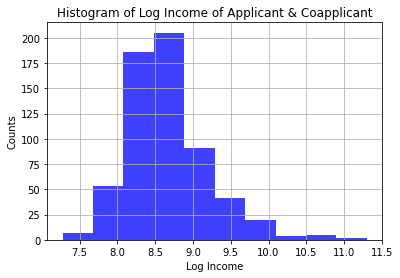

In [122]:
# the histogram of the data
n, bins, patches = plt.hist(cleaned_df['Log_Income'], 10, density=False, facecolor='blue', alpha=0.75)

plt.xlabel('Log Income')
plt.ylabel('Counts')
plt.title('Histogram of Log Income of Applicant & Coapplicant')
plt.grid(True)
plt.show()

Feature engineering thoughts:
Use Log_Income and Log_Loan_Amounts -> gets rid of the extreme values and outliers
Use Education, Self_Employed, Dependents (Change to Binary), Credit history, Loan_Amount_Term

In [144]:
cleaned_df['Dependents'] = cleaned_df['Dependents'].replace({0:"0",'2':'1', '3+':'1'})

In [145]:
cleaned_df['Dependents'].unique()

array(['0', '1'], dtype=object)

In [131]:
cleaned_df.head()

NameError: name 'cleaned_df' is not defined

In [130]:
X_df = cleaned_df[['Gender','Married','Dependents','Education','Self_Employed','Log_LoanAmount','Log_Income','Credit_History','Loan_Amount_Term','Property_Area']]
y_df = cleaned_df[['Loan_Status']]

NameError: name 'cleaned_df' is not defined

In [173]:
#X_df['Gender'] = X_df['Gender'].replace({'Male':0, 'Female':1, 'Other':2})
#X_df['Married'] = X_df['Married'].replace({'No':0, 'Yes':1})
#X_df['Education'] = X_df['Education'].replace({'Graduate':0, 'Not Graduate':1})
#X_df['Self_Employed'] = X_df['Self_Employed'].replace({'No':0, 'Yes':1})
#X_df['Property_Area'] = X_df['Property_Area'].replace({'Urban':0, 'Semiurban':1, 'Rural':2})
#'Gender','Married','Education','Self_Employed','Property_Area']

C:\Users\brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


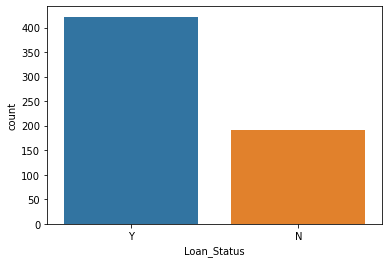

In [195]:
ax = sns.countplot(cleaned_df['Loan_Status'])

In [129]:
X_df = pd.get_dummies(X_df)
y_df['Loan_Status'] = y_df['Loan_Status'].replace({"Y":1,"N":0})

NameError: name 'X_df' is not defined

In [239]:
#Spliting Data for Testing and Training. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=42)

In [236]:
#Scale the Data with a standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
cleaned_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Log_LoanAmount', 'Log_Income'],
      dtype='object')

In [208]:
feats = cleaned_df.columns.values.tolist()

In [209]:
feats

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Log_LoanAmount',
 'Log_Income']

In [217]:
#separting Categorical and numerical
cat_feats = feats[1:6]
cat_feats.append(feats[10])
cat_feats.append(feats[11])

In [ ]:
Change 'Gender to Other'
Married to "No"
Dependents to 0
Self_employed to No
LoanAmount median
Loan_amount_term mode
credit_History to 0. 

In [211]:
num_feats = feats[6:10]

In [218]:
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [282]:
num_original = num_feats[-1]

In [291]:
num_logs = feats[13:]

In [292]:
num_logs

['Log_LoanAmount', 'Log_Income']

## 4. Building a Predictive Model

Models to use: 
Logistic
Random Forest Classifier
Gradient Boost?

In [241]:
#converting y values to a format I can use in models
y2 = y_train.values.ravel()
y_train = np.array(y2).astype(int)

In [247]:
#converting y values to a format I can use in models
y3 = y_test.values.ravel()
y_test = np.array(y3).astype(int)

In [244]:
y_train.shape

(491,)

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [258]:
#Logistic regression
LR = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

lr_pred = LR.predict(X_test_scaled)

print(accuracy_score(y_test,lr_pred))
print(precision_score(y_test, lr_pred))
print(recall_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

0.7560975609756098
0.7551020408163265
0.925
[[19 24]
 [ 6 74]]


In [272]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0).fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)

print(accuracy_score(y_test,rf_pred))
print(precision_score(y_test, rf_pred))
print(recall_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

0.7317073170731707
0.7526881720430108
0.875
[[20 23]
 [10 70]]


In [281]:
# Gradient Boosting
Gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_scaled, y_train)

gb_pred = Gb.predict(X_test_scaled)

print(accuracy_score(y_test,gb_pred))
print(precision_score(y_test, gb_pred))
print(recall_score(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))

0.7479674796747967
0.7634408602150538
0.8875
[[21 22]
 [ 9 71]]


In [330]:
from sklearn.svm import LinearSVC
Lsvc = LinearSVC(random_state=0, C=0.01, max_iter = 6000).fit(X_train_scaled,y_train)

svc_pred = Lsvc.predict(X_test_scaled)

print(accuracy_score(y_test,svc_pred))
print(precision_score(y_test, svc_pred))
print(recall_score(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))

0.7723577235772358
0.776595744680851
0.9125
[[22 21]
 [ 7 73]]


Try parameter grid search to improve the results

In [145]:
from sklearn.model_selection import RandomizedSearchCV
linear = LinearSVC(random_state=0, C=0.01, max_iter = 10000)
distributions = dict(C=[0.01,0.05,0.1,0.5,1],
                   max_iter =[9000,8000],
                    )

clf = RandomizedSearchCV(linear, distributions, random_state=0)
clf = clf.fit(X_new,y_train)

In [146]:
x_model = clf.best_estimator_
x_hyperparams = clf.best_params_
x_acc = clf.score(X_test_new,y_test)
print(f'Best test set accuracy: {x_acc}\nAchieved with hyperparameters:{x_hyperparams}')

Best test set accuracy: 0.7723577235772358
Achieved with hyperparameters:{'max_iter': 9000, 'C': 0.1}


In [135]:
svc2_pred = x_model.predict(X_test_new)

In [136]:
print(accuracy_score(y_test,svc2_pred))
print(precision_score(y_test, svc2_pred))
print(recall_score(y_test, svc2_pred))
print(confusion_matrix(y_test, svc2_pred))

0.6504065040650406
0.6504065040650406
1.0
[[ 0 43]
 [ 0 80]]


In [148]:
X_new = SelectKBest(k=3).fit_transform(X_train, y_train)

X_test_new = SelectKBest(k=3).fit_transform(X_test, y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names_out'

In [177]:
# Create and fit selector
selector = SelectKBest(k=4)
selector.fit(X_train, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]

In [178]:
features_df_new

,Credit_History,Married_No,Married_Yes,Property_Area_Semiurban
83,0.0,0,1,1
90,1.0,0,1,1
227,1.0,0,1,1
482,1.0,0,1,1
464,0.0,1,0,1
...,...,...,...,...
71,1.0,0,1,1
106,1.0,0,1,0
270,1.0,1,0,0
435,1.0,1,0,1


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [332]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [38]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
y = y.replace({"Y":1,"N":0})
y2 = y.values.ravel()
y = np.array(y2).astype(int)

In [50]:
def preprocess(X):
    input_df = X.copy()
    #Changing History and Dependents to Zero
    input_df[['Credit_History', 'Dependents']]= input_df[['Credit_History','Dependents']].fillna(value=0)
    #Clean dependents
    input_df['Dependents'] = input_df['Dependents'].replace({0:"0",'2':'1', '3+':'1'})
    #Changing Self_employed and Married to No
    input_df[['Married','Self_Employed']]= input_df[['Married','Self_Employed']].fillna('No')
    #Changing Loan to Median
    input_df['LoanAmount']= input_df['LoanAmount'].fillna(input_df['LoanAmount'].median())
    #Changing Loan term amount to mode
    input_df['Loan_Amount_Term']= input_df['Loan_Amount_Term'].fillna(input_df['Loan_Amount_Term'].mode()[0])
    #Changing Gender to Other
    input_df['Gender'] = input_df['Gender'].fillna('Other')
    #Changing Loan amounts and such to Log
    input_df['Log_LoanAmount'] = np.log(input_df['LoanAmount'])
    input_df["Log_Income"] = (np.log(input_df['ApplicantIncome'] + input_df['CoapplicantIncome']))
    #Removing uneeded columns
    input_df = input_df.drop(columns = ['ApplicantIncome','CoapplicantIncome','Loan_ID','LoanAmount'])
    #Getting dummies
    output_df = pd.get_dummies(input_df)
    return output_df

In [51]:
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
#Cleaning the data. 
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [14]:
X_train.head(1)

,Loan_Amount_Term,Credit_History,Log_LoanAmount,Log_Income,Gender_Female,Gender_Male,Gender_Other,Married_No,Married_Yes,Dependents_0,Dependents_1,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
83,360.0,0.0,5.57973,9.017968,0,1,0,0,1,1,0,1,0,1,0,0,1,0


In [169]:
scale_num_transform = Pipeline([('scaling',StandardScaler())])

preprocessing = ColumnTransformer([('numeric', scale_num_transform, ['Loan_Amount_Term'])],
                                  remainder='passthrough')

feature_union = FeatureUnion([('pca', PCA(n_components=5)),
                             ('select_best', SelectKBest(k=5))])
                                        
pipeline = Pipeline(steps = [('scaler', preprocessing),
                             ('features', feature_union),
                            ('classifier', LinearSVC(C=0.016, max_iter = 9000, random_state=0))])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('select_best',
                                                 SelectKBest(k=5))])),
                ('classifier',
                 LinearSVC(C=0.016, max_iter=9000, random_state=0))])

In [170]:
pipe_pred = pipeline.predict(X_test)

In [171]:
print(accuracy_score(y_test,pipe_pred))
print(precision_score(y_test, pipe_pred))
print(recall_score(y_test, pipe_pred))
print(confusion_matrix(y_test, pipe_pred))

0.7479674796747967
0.7378640776699029
0.95
[[16 27]
 [ 4 76]]


In [185]:
roc_auc_score(y_test,pipe_pred)

0.661046511627907

In [120]:
#import the module
import pickle
with open('model.pickle', 'wb') as fh:
    pickle.dump(pipeline, fh)

At this point, try out different features, and see what data works best.
Then Pick the optimal parameters using gridsearchCV
There are 18 features right now. 

In [174]:
class DataframeFunctionTransformer():
    def __init__(self):
        print('Intiated')

    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, y=None):
        input_df = X.copy()
        #Changing History and Dependents to Zero
        input_df[['Credit_History', 'Dependents']]= input_df[['Credit_History','Dependents']].fillna(value=0)
        #Clean dependents
        input_df['Dependents'] = input_df['Dependents'].replace({0:"0",'2':'1', '3+':'1'})
        #Changing Self_employed and Married to No
        input_df[['Married','Self_Employed']]= input_df[['Married','Self_Employed']].fillna('No')
        #Changing Loan to Median
        input_df['LoanAmount']= input_df['LoanAmount'].fillna(input_df['LoanAmount'].median())
        #Changing Loan term amount to mode
        input_df['Loan_Amount_Term']= input_df['Loan_Amount_Term'].fillna(input_df['Loan_Amount_Term'].mode()[0])
        #Changing Gender to Other
        input_df['Gender'] = input_df['Gender'].fillna('Other')
        #Changing Loan amounts and such to Log
        input_df['Log_LoanAmount'] = np.log(input_df['LoanAmount'])
        input_df["Log_Income"] = (np.log(input_df['ApplicantIncome'] + input_df['CoapplicantIncome']))
        #Removing uneeded columns
        input_df = input_df.drop(columns = ['ApplicantIncome','CoapplicantIncome','Loan_ID','LoanAmount'])
        #Getting dummies
        output_df = pd.get_dummies(input_df)
        print(output_df.shape)
        return output_df

pipeline = Pipeline(steps = [('transformer', DataframeFunctionTransformer()),
                             ('features', SelectKBest()),
                            ('classifier', LinearSVC(random_state=0, C=0.01, max_iter = 6000))])


param_grid = ({'classifier__C': [0.1, 10, 100],
               'classifier__tol': [1e-15, 1e-14],
               'classifier__max_iter': [1000, 5000, 10000],
             'features__k':[3, 6, 9, 12]})
                             
                             
grid = GridSearchCV(pipeline, param_grid = param_grid, cv=5 )
#grid.fit(X_train, y_train)

Intiated


In [53]:
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test,y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters:{best_hyperparams}')

Best test set accuracy: 0.7723577235772358
Achieved with hyperparameters:{'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__tol': 1e-15, 'select_best__k': 3}


In [ ]:
pipeline.predict(X_test)

In [ ]:
df

Change 'Gender to Other'
Married to "No"
Dependents to 0 (Kids or no kids)
Self_employed to No
LoanAmount median
Loan_amount_term mode
credit_History to 0. 

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
from sklearn.svm import LinearSVC
Lsvc = LinearSVC(random_state=0, C=1, max_iter = 1000).fit(X_train,y_train)

svc_pred = Lsvc.predict(X_test_scaled)

print(accuracy_score(y_test,svc_pred))
print(precision_score(y_test, svc_pred))
print(recall_score(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))

In [ ]:
import json
json_data = X_test[0:1].to_json(orient = 'records') 
json_data = json.loads(json_data)

In [123]:
import json
json_data = X_test.head(5).to_json(orient = 'records')
json_data = json.loads(json_data)


In [175]:
X_test.head(5)

,Loan_Amount_Term,Credit_History,Log_LoanAmount,Log_Income,Gender_Female,Gender_Male,Gender_Other,Married_No,Married_Yes,Dependents_0,Dependents_1,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
350,360.0,1.0,5.429346,9.114160,0,1,0,0,1,1,0,1,0,1,0,0,1,0
377,360.0,0.0,4.867534,8.368693,0,1,0,0,1,1,0,1,0,1,0,0,1,0
163,360.0,1.0,5.062595,8.633019,0,1,0,0,1,0,1,1,0,1,0,1,0,0
609,360.0,1.0,4.262680,7.972466,1,0,0,1,0,1,0,1,0,1,0,1,0,0
132,360.0,1.0,4.248495,7.907652,0,1,0,1,0,1,0,1,0,1,0,0,1,0


In [127]:
X_test.head(5).to_csv('test.csv', index = False)


Text(0.5, 257.44, 'Predicted label')

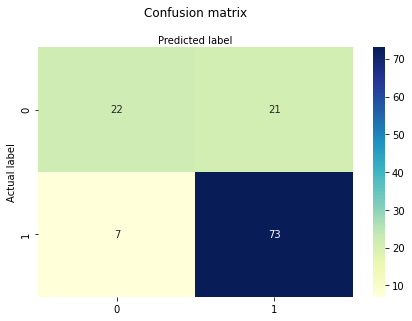

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(pd.DataFrame(confusion_matrix(y_test, pipe_pred))), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')